# 서울 월드컵 경기장 관객수 분석

## in 연산자를 이용한 K리그의 월드컵 경기장 관객수 출력

In [8]:
import csv

f = open('seoul_worldcup.csv', encoding='cp949')  
data = csv.reader(f)
header = next(data)

for row in data:
    if 'K리그' in row[3]: 
        game_date = row[1]  
        attendance = row[6]  
        teams = row[4]     
        print(f"날짜: {game_date}, 경기: {teams}, 관객수: {attendance}명")

f.close()

날짜: 2015-03-14 14:00, 경기: K리그 클래식(vs전북), 관객수: 32516명
날짜: 2015-04-04 14:00, 경기: K리그 클래식-4R(vs제주), 관객수: 22155명
날짜: 2015-04-15 19:30, 경기: K리그 클래식-6R(vs대전), 관객수: 7186명
날짜: 2015-05-02 14:00, 경기: K리그 클래식-9R(vs성남), 관객수: 18441명
날짜: 2015-05-16 14:00, 경기: K리그 클래식-11R(vs전남), 관객수: 17819명
날짜: 2015-05-31 16:00, 경기: K리그 클래식(vs울산), 관객수: 18413명
날짜: 2015-06-03 19:30, 경기: K리그 클래식(vs인천), 관객수: 5023명
날짜: 2015-06-17 19:30, 경기: K리그 클래식(vs부산), 관객수: 4267명
날짜: 2015-06-27 17:00, 경기: K리그 클래식(vs수원), 관객수: 39328명
날짜: 2015-07-05 18:00, 경기: K리그 클래식(vs광주), 관객수: 11587명
날짜: 2015-07-11 19:00, 경기: K리그 클래식(vs포항), 관객수: 17913명
날짜: 2015-07-25 19:00, 경기: K리그 클래식(vs인천), 관객수: 10454명
날짜: 2015-08-22 19:00, 경기: K리그 클래식(vs대전), 관객수: 17986명
날짜: 2015-09-09 19:30, 경기: K리그 클래식(vs포항), 관객수: 9566명
날짜: 2015-09-23 19:30, 경기: K리그 클래식(vs성남), 관객수: 8792명
날짜: 2015-09-28 17:00, 경기: K리그 클래식(vs광주), 관객수: 17061명
날짜: 2015-10-04 14:00, 경기: K리그 클래식(vs전남), 관객수: 20192명
날짜: 2015-10-25 16:00, 경기: K리그 스플릿(vs전북), 관객수: 24262명
날짜: 2015-11-07 15:00, 경기: K리그 스플릿(vs수원

## 서울월드컵 경기장 2015년 K리그 월별 관객수 분석

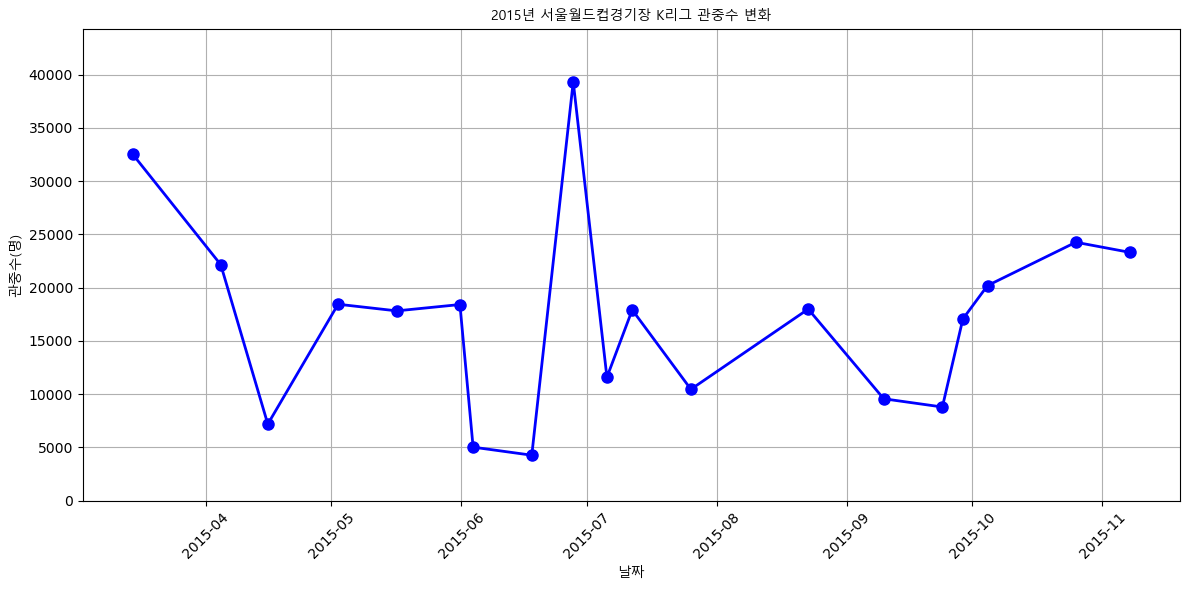

In [16]:
import csv
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from datetime import datetime

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

관객수_데이터 = []
날짜_데이터 = []

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:  # K리그 경기만 선택
       date = row[1]  # 경기 일시
       if len(date) > 5:  # 날짜 형식 확인
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')  # 날짜 형식 변환
           if date_obj.year == 2015:  # 2015년 데이터만 선택
               관객수_데이터.append(int(row[6]))  # 관람인수
               날짜_데이터.append(date_obj)

f.close()

# 날짜순으로 데이터 정렬
날짜_데이터, 관객수_데이터 = zip(*sorted(zip(날짜_데이터, 관객수_데이터)))

plt.figure(figsize=(12, 6))
plt.plot(날짜_데이터, 관객수_데이터, color='blue', marker='o', linewidth=2, markersize=8)
plt.ylim(0, max(관객수_데이터) + 5000)
plt.title('2015년 서울월드컵경기장 K리그 관중수 변화', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('관중수(명)', fontproperties=font_prop)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2015년 평균 관중수 그래프

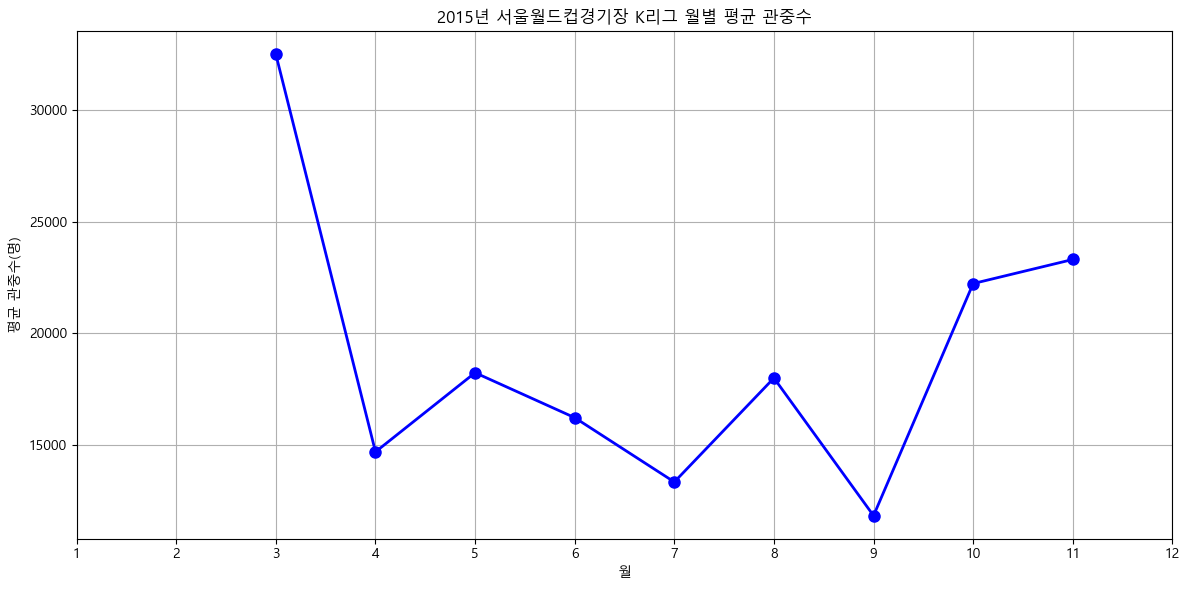

In [11]:
from collections import defaultdict

plt.rcParams['font.family'] = 'Malgun Gothic'

월별_관객수_2015 = defaultdict(list)

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
       if date_obj.year == 2015:
           월별_관객수_2015[date_obj.month].append(int(row[6]))

f.close()

월_2015 = []
평균_관객수_2015 = []

for 월 in range(1, 13):
   if 월별_관객수_2015[월]:
       월_2015.append(월)
       평균_관객수_2015.append(sum(월별_관객수_2015[월]) / len(월별_관객수_2015[월]))

plt.figure(figsize=(12, 6))

plt.plot(월_2015, 평균_관객수_2015, color='blue', marker='o', linewidth=2, markersize=8)

plt.title('2015년 서울월드컵경기장 K리그 월별 평균 관중수')
plt.xlabel('월')
plt.ylabel('평균 관중수(명)')
plt.grid(True)
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

## 서울월드컵 경기장 2023년 K리그 월별 관객수 분석

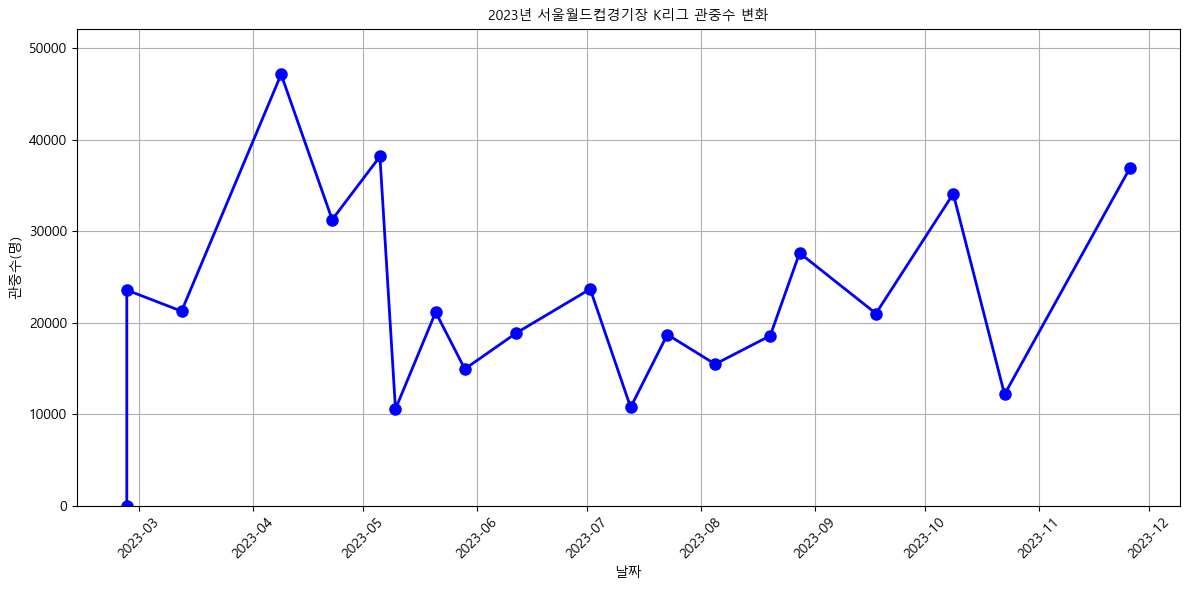

In [13]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

관객수_데이터 = []
날짜_데이터 = []

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:  
       date = row[1]  
       if len(date) > 5:  
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M') 
           if date_obj.year == 2023: 
               관객수_데이터.append(int(row[6]))  
               날짜_데이터.append(date_obj)

f.close()

날짜_데이터, 관객수_데이터 = zip(*sorted(zip(날짜_데이터, 관객수_데이터)))

plt.figure(figsize=(12, 6))
plt.plot(날짜_데이터, 관객수_데이터, color='blue', marker='o', linewidth=2, markersize=8)
plt.ylim(0, max(관객수_데이터) + 5000)
plt.title('2023년 서울월드컵경기장 K리그 관중수 변화', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('관중수(명)', fontproperties=font_prop)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 23년도 평균 관중수 선그래프

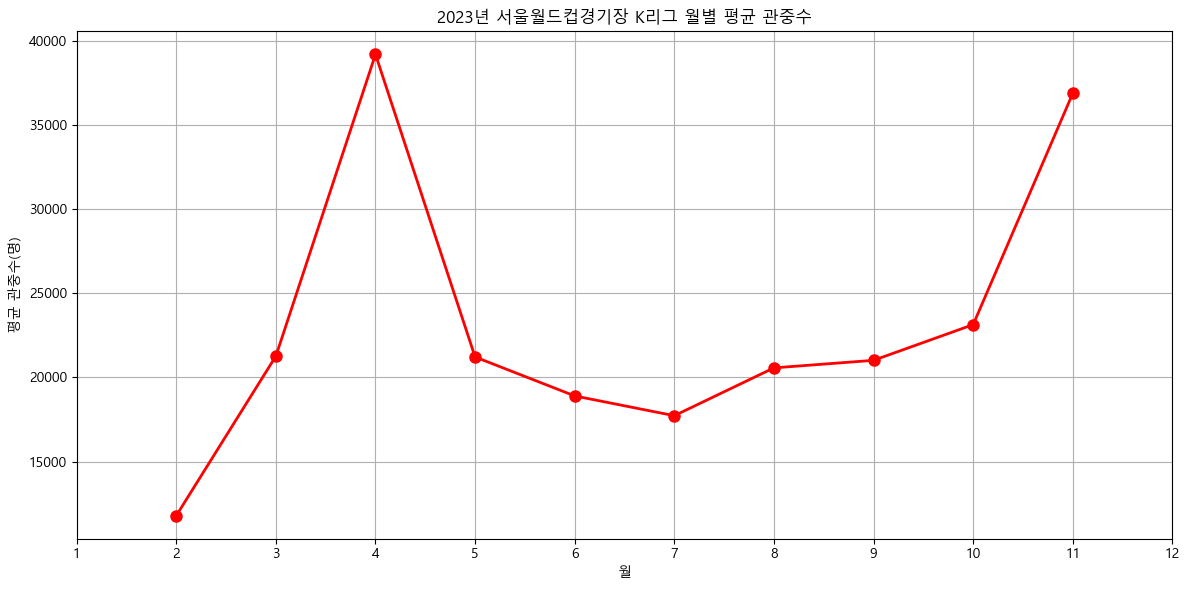

In [18]:

plt.rcParams['font.family'] = 'Malgun Gothic'
월별_관객수_2023 = defaultdict(list)

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
       if date_obj.year == 2023:
           월별_관객수_2023[date_obj.month].append(int(row[6]))

f.close()

월_2023 = []
평균_관객수_2023 = []

for 월 in range(1, 13):
   if 월별_관객수_2023[월]:
       월_2023.append(월)
       평균_관객수_2023.append(sum(월별_관객수_2023[월]) / len(월별_관객수_2023[월]))

plt.figure(figsize=(12, 6))

plt.plot(월_2023, 평균_관객수_2023, color='red', marker='o', linewidth=2, markersize=8)

plt.title('2023년 서울월드컵경기장 K리그 월별 평균 관중수')
plt.xlabel('월')
plt.ylabel('평균 관중수(명)')
plt.grid(True)
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

## 선 그래프를 이용한 2015년, 2023년의 서울 월드컵 경기장 평균 관객수 비교 조사

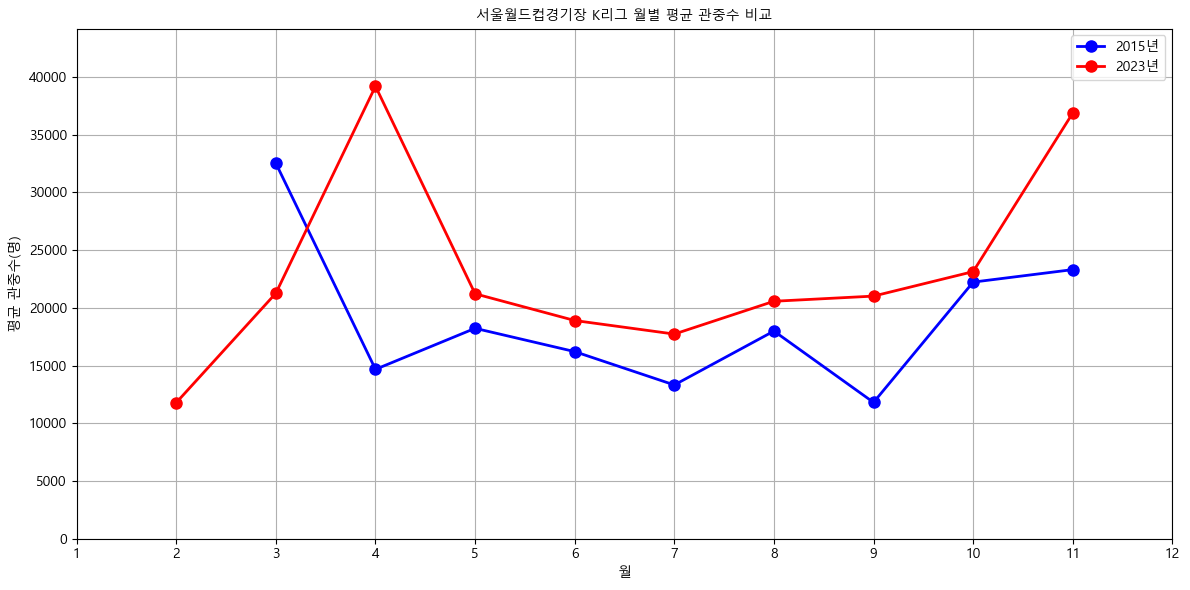

In [20]:

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 월별 평균 관객수를 저장할 딕셔너리
월별_관객수_2015 = defaultdict(list)
월별_관객수_2023 = defaultdict(list)

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]: 
       date = row[1]  
       date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
       if date_obj.year == 2015:
           월별_관객수_2015[date_obj.month].append(int(row[6]))
       elif date_obj.year == 2023:
           월별_관객수_2023[date_obj.month].append(int(row[6]))

f.close()


월_2015 = []
평균_관객수_2015 = []
월_2023 = []
평균_관객수_2023 = []

for 월 in range(1, 13):
   if 월별_관객수_2015[월]: 
       월_2015.append(월)
       평균_관객수_2015.append(sum(월별_관객수_2015[월]) / len(월별_관객수_2015[월]))
   if 월별_관객수_2023[월]:  
       월_2023.append(월)
       평균_관객수_2023.append(sum(월별_관객수_2023[월]) / len(월별_관객수_2023[월]))

plt.figure(figsize=(12, 6))


plt.plot(월_2015, 평균_관객수_2015, color='blue', marker='o', linewidth=2, markersize=8, label='2015년')
plt.plot(월_2023, 평균_관객수_2023, color='red', marker='o', linewidth=2, markersize=8, label='2023년')


plt.ylim(0, max(max(평균_관객수_2015), max(평균_관객수_2023)) + 5000)
plt.title('서울월드컵경기장 K리그 월별 평균 관중수 비교', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.ylabel('평균 관중수(명)', fontproperties=font_prop)
plt.grid(True)
plt.legend(prop=font_prop)
plt.xticks(range(1, 13))  

plt.tight_layout()
plt.show()

## 코로나때의 서울월드컵 경기장 관객수 및 코로나 직후의 관객수 비교

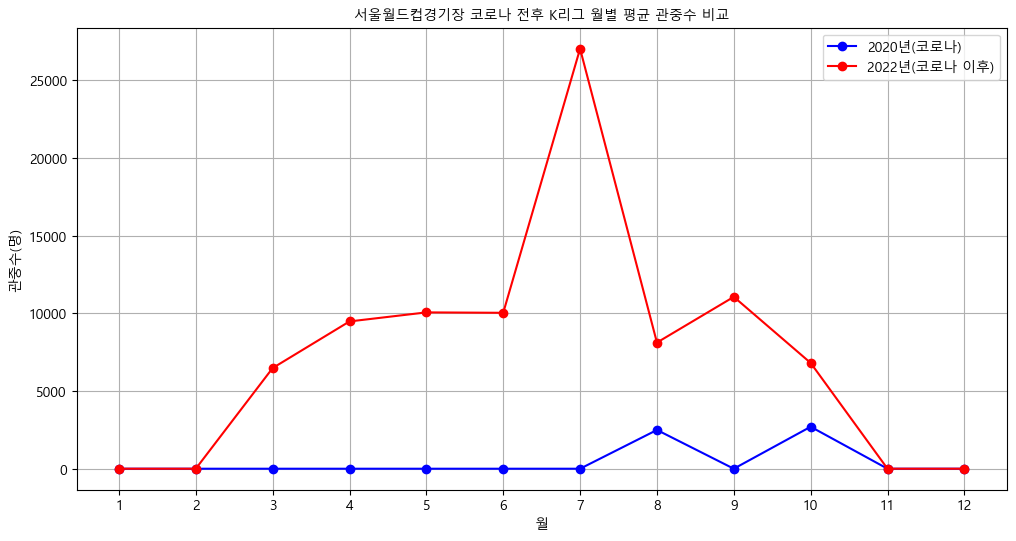

In [21]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

월별_관객수_2020 = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
월별_관객수_2022 = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
    if 'K리그' in row[3]:
        date = row[1]
        if len(date) > 5:
            date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
            관객 = int(row[6])
            
            if date_obj.year == 2020:
                월별_관객수_2020[date_obj.month].append(관객)
            elif date_obj.year == 2022:
                월별_관객수_2022[date_obj.month].append(관객)

f.close()

월_리스트 = list(range(1, 13))
평균_2020 = []
평균_2022 = []

for 월 in 월_리스트:
    if len(월별_관객수_2020[월]) > 0:
        평균_2020.append(sum(월별_관객수_2020[월]) / len(월별_관객수_2020[월]))
    else:
        평균_2020.append(0)
    
    if len(월별_관객수_2022[월]) > 0:
        평균_2022.append(sum(월별_관객수_2022[월]) / len(월별_관객수_2022[월]))
    else:
        평균_2022.append(0)

plt.figure(figsize=(12, 6))
plt.plot(월_리스트, 평균_2020, 'b-o', label='2020년(코로나)')
plt.plot(월_리스트, 평균_2022, 'r-o', label='2022년(코로나 이후)')

plt.title('서울월드컵경기장 코로나 전후 K리그 월별 평균 관중수 비교', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.ylabel('관중수(명)', fontproperties=font_prop)
plt.grid(True)
plt.legend(prop=font_prop)
plt.xticks(월_리스트)

plt.show()

## 막대 그래프를 이용한 15년부터 23년까지의 8월 막대 그래프 비교 분석 

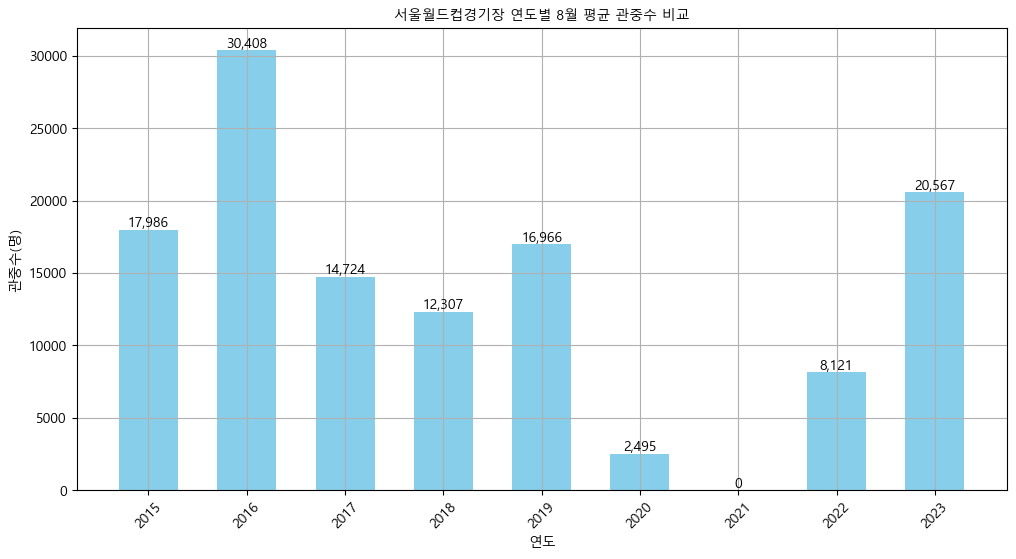

In [22]:


font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

월별_관객수 = {2015:[], 2016:[], 2017:[], 2018:[], 2019:[], 2020:[], 2021:[], 2022:[], 2023:[]}

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
           관객 = int(row[6])
           
           if date_obj.month == 8 and date_obj.year in 월별_관객수:
               월별_관객수[date_obj.year].append(관객)

f.close()

연도_리스트 = list(range(2015, 2024))
평균_관객수 = []

for 연도 in 연도_리스트:
   if len(월별_관객수[연도]) > 0:
       평균_관객수.append(sum(월별_관객수[연도]) / len(월별_관객수[연도]))
   else:
       평균_관객수.append(0)

plt.figure(figsize=(12, 6))

bars = plt.bar(연도_리스트, 평균_관객수, color='skyblue', width=0.6)

for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom')

plt.title('서울월드컵경기장 연도별 8월 평균 관중수 비교', fontproperties=font_prop)
plt.xlabel('연도', fontproperties=font_prop)
plt.ylabel('관중수(명)', fontproperties=font_prop)
plt.grid(True)
plt.xticks(연도_리스트, rotation=45)

plt.show()

## 막대 그래프를 이용한 2015년, 2023년 월별 막대 그래프 비교 분석 

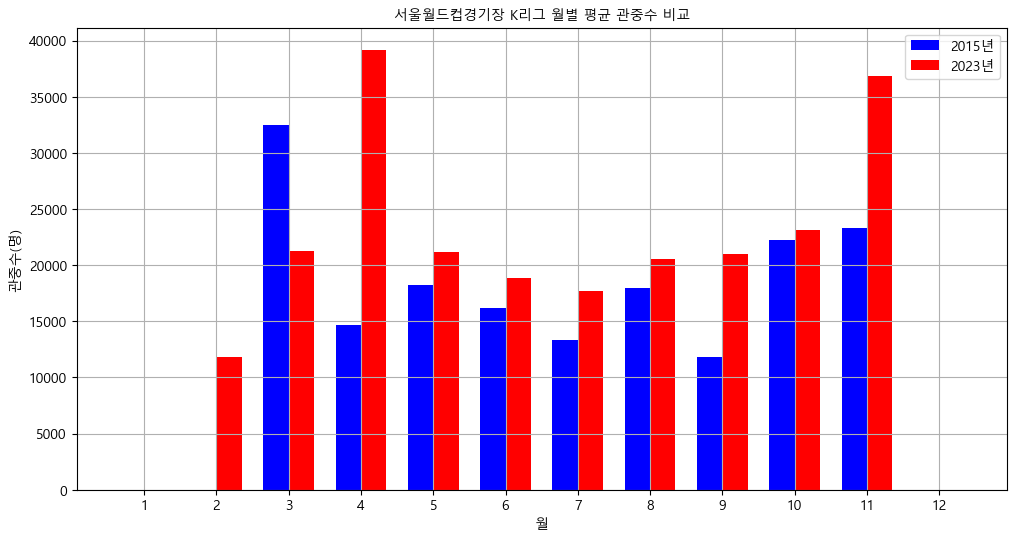

In [23]:

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

월별_관객수_2015 = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
월별_관객수_2023 = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
           관객 = int(row[6])
           
           if date_obj.year == 2015:
               월별_관객수_2015[date_obj.month].append(관객)
           elif date_obj.year == 2023:
               월별_관객수_2023[date_obj.month].append(관객)

f.close()

월_리스트 = list(range(1, 13))
평균_2015 = []
평균_2023 = []

for 월 in 월_리스트:
   if len(월별_관객수_2015[월]) > 0:
       평균_2015.append(sum(월별_관객수_2015[월]) / len(월별_관객수_2015[월]))
   else:
       평균_2015.append(0)
   
   if len(월별_관객수_2023[월]) > 0:
       평균_2023.append(sum(월별_관객수_2023[월]) / len(월별_관객수_2023[월]))
   else:
       평균_2023.append(0)

plt.figure(figsize=(12, 6))

x = range(len(월_리스트))
width = 0.35

plt.bar([i - width/2 for i in x], 평균_2015, width, label='2015년', color='blue')
plt.bar([i + width/2 for i in x], 평균_2023, width, label='2023년', color='red')

plt.title('서울월드컵경기장 K리그 월별 평균 관중수 비교', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.ylabel('관중수(명)', fontproperties=font_prop)
plt.grid(True)
plt.legend(prop=font_prop)
plt.xticks(x, 월_리스트)

plt.show()

## Barh()를 이용한 15년, 23년 관객수 분석

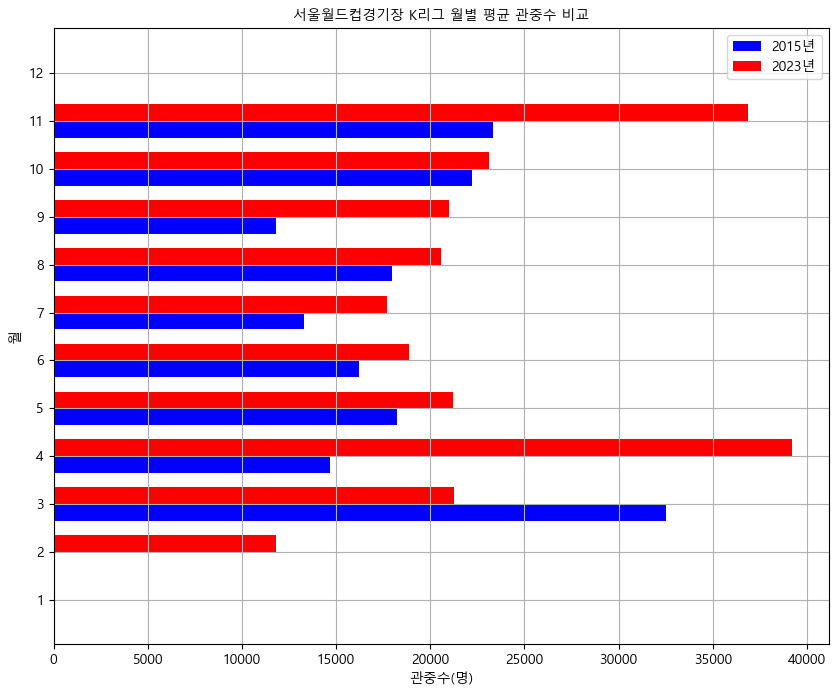

In [24]:


font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

월별_관객수_2015 = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
월별_관객수_2023 = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
           관객 = int(row[6])
           
           if date_obj.year == 2015:
               월별_관객수_2015[date_obj.month].append(관객)
           elif date_obj.year == 2023:
               월별_관객수_2023[date_obj.month].append(관객)

f.close()

월_리스트 = list(range(1, 13))
평균_2015 = []
평균_2023 = []

for 월 in 월_리스트:
   if len(월별_관객수_2015[월]) > 0:
       평균_2015.append(sum(월별_관객수_2015[월]) / len(월별_관객수_2015[월]))
   else:
       평균_2015.append(0)
   
   if len(월별_관객수_2023[월]) > 0:
       평균_2023.append(sum(월별_관객수_2023[월]) / len(월별_관객수_2023[월]))
   else:
       평균_2023.append(0)

plt.figure(figsize=(10, 8))

y = range(len(월_리스트))
width = 0.35

plt.barh([i - width/2 for i in y], 평균_2015, width, label='2015년', color='blue')
plt.barh([i + width/2 for i in y], 평균_2023, width, label='2023년', color='red')

plt.title('서울월드컵경기장 K리그 월별 평균 관중수 비교', fontproperties=font_prop)
plt.xlabel('관중수(명)', fontproperties=font_prop)
plt.ylabel('월', fontproperties=font_prop)
plt.grid(True)
plt.legend(prop=font_prop)
plt.yticks(y, 월_리스트)

plt.show()

## 원그래프를 이용한 15년도 구단별 비교 그래프

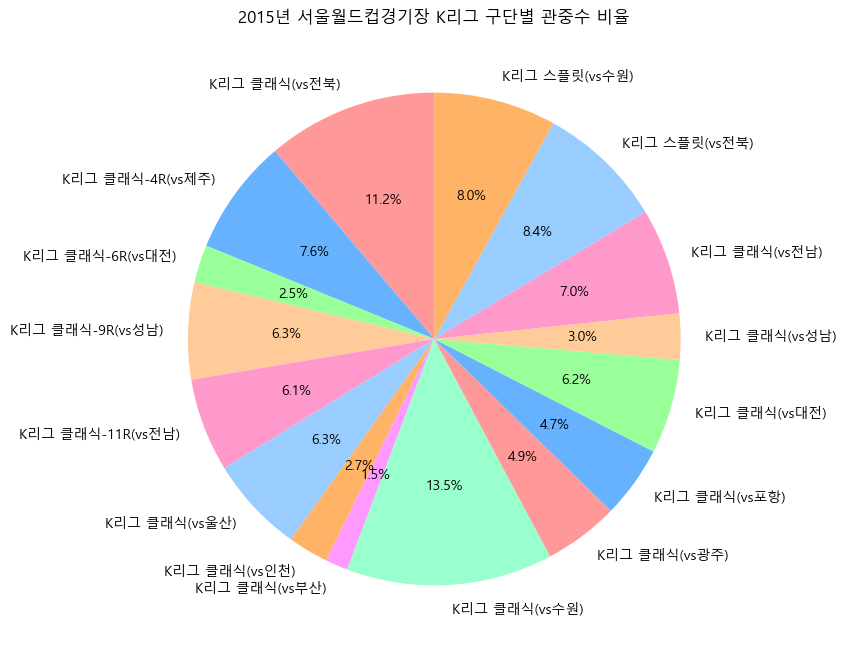

In [25]:


font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Malgun Gothic'

구단별_관객수 = {}

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
           if date_obj.year == 2015:
               팀명 = row[4]
               관객 = int(row[6])
               if 팀명 in 구단별_관객수:
                   구단별_관객수[팀명].append(관객)
               else:
                   구단별_관객수[팀명] = [관객]

f.close()

구단_평균 = {}
for 팀명, 관객수 in 구단별_관객수.items():
   구단_평균[팀명] = sum(관객수) / len(관객수)

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#FFB366', '#FF99FF', '#99FFCC']

plt.figure(figsize=(10, 8))
plt.pie(구단_평균.values(), labels=구단_평균.keys(), autopct='%.1f%%', startangle=90, colors=colors)
plt.title('2015년 서울월드컵경기장 K리그 구단별 관중수 비율')

plt.show()

## 원그래프를 이용한 23년도 구단별 비교 그래프

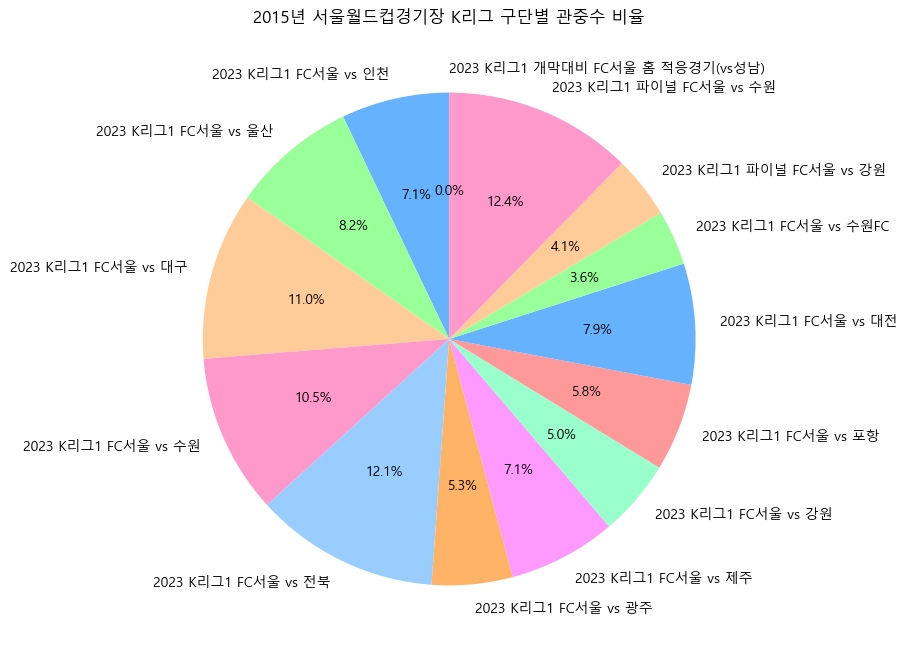

In [26]:


font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Malgun Gothic'

구단별_관객수 = {}

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
           if date_obj.year == 2023:
               팀명 = row[4]
               관객 = int(row[6])
               if 팀명 in 구단별_관객수:
                   구단별_관객수[팀명].append(관객)
               else:
                   구단별_관객수[팀명] = [관객]

f.close()

구단_평균 = {}
for 팀명, 관객수 in 구단별_관객수.items():
   구단_평균[팀명] = sum(관객수) / len(관객수)

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#FFB366', '#FF99FF', '#99FFCC']

plt.figure(figsize=(10, 8))
plt.pie(구단_평균.values(), labels=구단_평균.keys(), autopct='%.1f%%', startangle=90, colors=colors)
plt.title('2015년 서울월드컵경기장 K리그 구단별 관중수 비율')

plt.show()

## 산점도를 이용한 23년도 계절별 관객수 분석

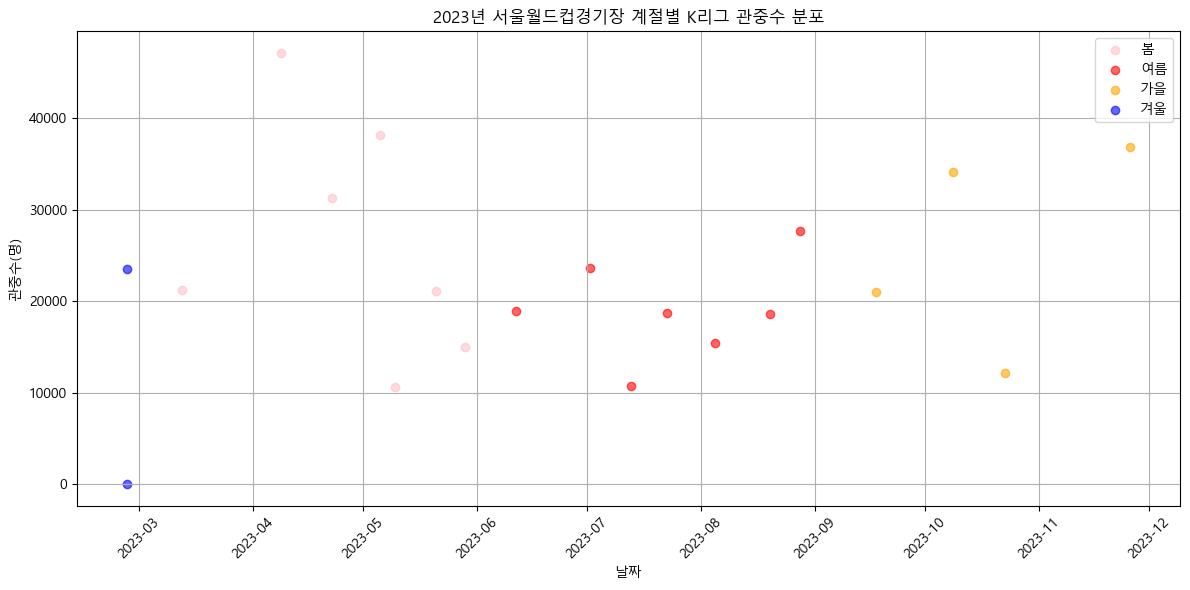

In [27]:


plt.rcParams['font.family'] = 'Malgun Gothic'

관객수_데이터 = []
날짜_데이터 = []
계절_데이터 = []

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

def 계절_구분(month):
   if month in [3, 4, 5]:
       return '봄'
   elif month in [6, 7, 8]:
       return '여름'
   elif month in [9, 10, 11]:
       return '가을'
   else:
       return '겨울'

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
           if date_obj.year == 2023:
               관객수_데이터.append(int(row[6]))
               날짜_데이터.append(date_obj)
               계절_데이터.append(계절_구분(date_obj.month))

f.close()

plt.figure(figsize=(12, 6))

colors = {'봄': 'pink', '여름': 'red', '가을': 'orange', '겨울': 'blue'}
for 계절 in ['봄', '여름', '가을', '겨울']:
   계절_인덱스 = [i for i, s in enumerate(계절_데이터) if s == 계절]
   if 계절_인덱스:  # 해당 계절의 데이터가 있는 경우만
       plt.scatter([날짜_데이터[i] for i in 계절_인덱스], 
                  [관객수_데이터[i] for i in 계절_인덱스],
                  label=계절,
                  color=colors[계절],
                  alpha=0.6)

plt.title('2023년 서울월드컵경기장 계절별 K리그 관중수 분포')
plt.xlabel('날짜')
plt.ylabel('관중수(명)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 15~23년까지 가장 합산 관객수가 높았던 달

In [28]:
f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

월별_최대 = 0
최대_월 = 0
최대_년도 = 0

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           월 = int(date.split('-')[1])  
           년도 = int(date.split('-')[0])  
           관객 = int(row[6]) 
           
           if 2015 <= 년도 <= 2023: 
               if 관객 > 월별_최대:
                   월별_최대 = 관객
                   최대_월 = 월
                   최대_년도 = 년도

print(f"최대 관중수가 있었던 시기: {최대_년도}년 {최대_월}월")
print(f"관중수: {월별_최대}명")

f.close()

최대 관중수가 있었던 시기: 2022년 7월
관중수: 63234명


## 15~23년까지 가장 합산 관객수가 낮았던 달

In [29]:
f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

월별_최소 = float('inf')  
최소_월 = 0
최소_년도 = 0

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           월 = int(date.split('-')[1])  
           년도 = int(date.split('-')[0])  
           관객 = int(row[6])  
           
           if 2015 <= 년도 <= 2023:  
               if 관객 < 월별_최소:
                   월별_최소 = 관객
                   최소_월 = 월
                   최소_년도 = 년도

print(f"최소 관중수가 있었던 시기: {최소_년도}년 {최소_월}월")
print(f"관중수: {월별_최소}명")

f.close()

최소 관중수가 있었던 시기: 2020년 5월
관중수: 0명


## 15~23년까지 상대했던 구단 중 합산 관객수가 가장 많은 구단 및 그 구단과 대결했던 경기 중 관객수가 가장 높았던 날

In [30]:
f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

구단별_합산 = {}
구단별_최대 = {}  
구단별_최대_날짜 = {}  

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           년도 = int(date.split('-')[0])
           if 2015 <= 년도 <= 2023:
               팀명 = row[4].split('vs')[1].strip()
               관객 = int(row[6])

               if 팀명 in 구단별_합산:
                   구단별_합산[팀명] += 관객
               else:
                   구단별_합산[팀명] = 관객

               if 팀명 not in 구단별_최대 or 관객 > 구단별_최대[팀명]:
                   구단별_최대[팀명] = 관객
                   구단별_최대_날짜[팀명] = date

최대_관객_구단 = max(구단별_합산.items(), key=lambda x: x[1])
최다_관객_구단 = 최대_관객_구단[0]  

print(f"가장 많은 관중수를 기록한 상대 구단: {최다_관객_구단}")
print(f"합산 관중수: {최대_관객_구단[1]:,}명")
print(f"해당 구단과의 경기 중 최다 관중수: {구단별_최대[최다_관객_구단]:,}명")
print(f"최다 관중 경기 날짜: {구단별_최대_날짜[최다_관객_구단]}")

f.close()

가장 많은 관중수를 기록한 상대 구단: 전북
합산 관중수: 185,491명
해당 구단과의 경기 중 최다 관중수: 38,152명
최다 관중 경기 날짜: 2023-05-05 14:00


## 15~23년까지 막대그래프로 표현한 서울 월드컵 경기장 관객수

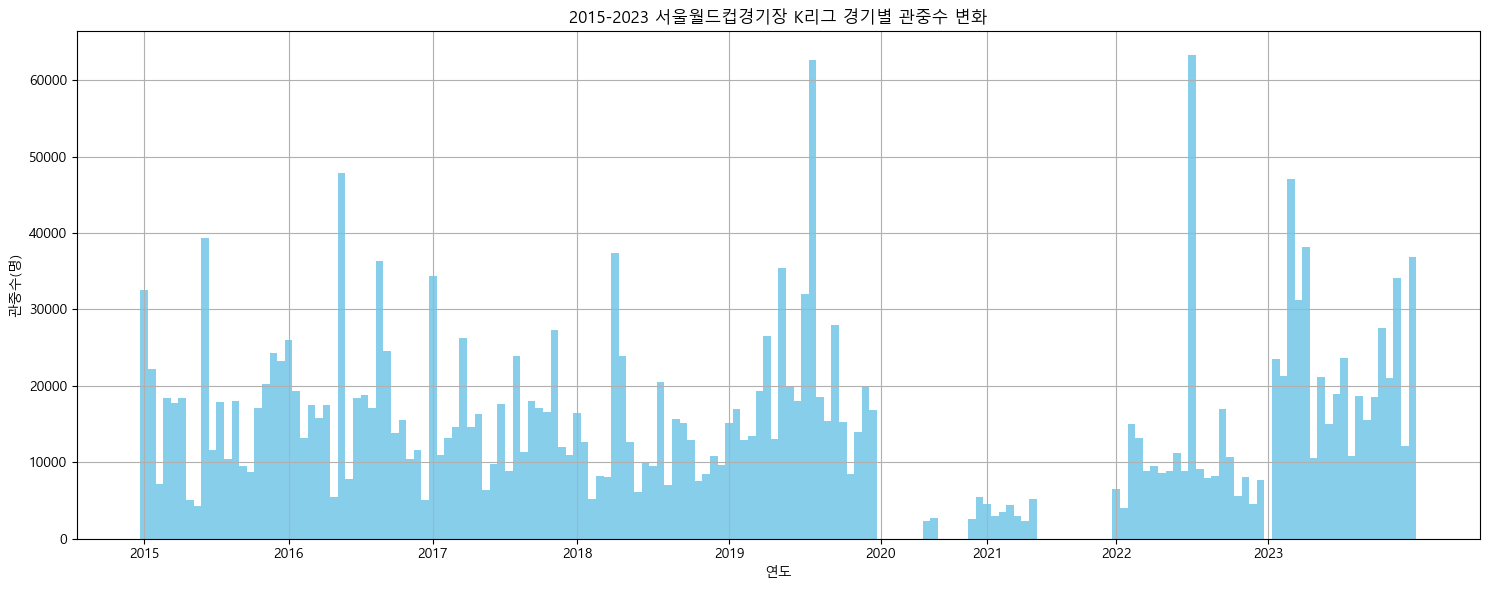

In [31]:
plt.rcParams['font.family'] = 'Malgun Gothic'

연도별_관객수 = {}

f = open('seoul_worldcup.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

for row in data:
   if 'K리그' in row[3]:
       date = row[1]
       if len(date) > 5:
           date_obj = datetime.strptime(date, '%Y-%m-%d %H:%M')
           년도 = date_obj.year
           if 2015 <= 년도 <= 2023:
               if 년도 not in 연도별_관객수:
                   연도별_관객수[년도] = []
               연도별_관객수[년도].append(int(row[6]))

f.close()

plt.figure(figsize=(15, 6))

all_data = []
연도_레이블 = []
현재_x = 0

for 년도 in sorted(연도별_관객수.keys()):
   관객수_리스트 = 연도별_관객수[년도]
   all_data.extend(관객수_리스트)
   연도_레이블.append((현재_x, str(년도)))
   현재_x += len(관객수_리스트)

plt.bar(range(len(all_data)), all_data, color='skyblue', width=1)

레이블_위치 = [x[0] for x in 연도_레이블]
레이블_텍스트 = [x[1] for x in 연도_레이블]
plt.xticks(레이블_위치, 레이블_텍스트)

plt.title('2015-2023 서울월드컵경기장 K리그 경기별 관중수 변화')
plt.xlabel('연도')
plt.ylabel('관중수(명)')
plt.grid(True)

plt.tight_layout()
plt.show()